In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

In [2]:
# Dependencies and Setup
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import csv
import nfl_data_py as nfl
import matplotlib.pyplot as plt

In [3]:
# Loading the file in 

file_path = ("Resources/clean_nfl_data.csv")
df = pd.read_csv(file_path)
df = pd.DataFrame(df)

df = df[["play_id" , "home_team" , "away_team" , "posteam" , "play_type" , "down" , "ydstogo" ,"rushing_yards" , "rush_attempt" , "rush_touchdown",
            "pass_attempt" , "complete_pass" , "passing_yards" , "pass_touchdown" , "touchdown"]]
df.head(10)

,play_id,home_team,away_team,posteam,play_type,down,ydstogo,rushing_yards,rush_attempt,rush_touchdown,pass_attempt,complete_pass,passing_yards,pass_touchdown,touchdown
0,55,TEN,ARI,TEN,run,1.0,10,-3.0,1,0,0,0,NaN,0,0
1,76,TEN,ARI,TEN,pass,2.0,13,NaN,0,0,1,1,3.0,0,0
2,100,TEN,ARI,TEN,pass,3.0,10,NaN,0,0,1,0,NaN,0,0
3,152,TEN,ARI,ARI,pass,1.0,10,NaN,0,0,1,1,38.0,0,0
4,181,TEN,ARI,ARI,run,1.0,10,2.0,1,0,0,0,NaN,0,0
5,218,TEN,ARI,ARI,pass,1.0,18,NaN,0,0,1,1,1.0,0,0
6,253,TEN,ARI,ARI,pass,2.0,17,NaN,0,0,1,1,21.0,0,0
7,282,TEN,ARI,ARI,run,1.0,9,0.0,1,0,0,0,NaN,0,0
8,386,TEN,ARI,ARI,pass,2.0,24,NaN,0,0,1,1,8.0,0,0
9,410,TEN,ARI,ARI,pass,3.0,16,NaN,0,0,1,0,NaN,0,0


In [4]:
# get total row count for reference
df.play_type.count()

35766

In [5]:
# seperate play type counts
playtype_count = df.groupby(["play_type"]).count()["posteam"]
playtype_count

play_type
pass    21010
run     14756
Name: posteam, dtype: int64

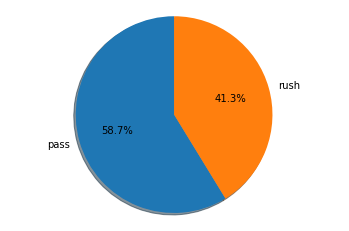

In [6]:
# Pie chart - Play Type 
labels = 'pass', 'rush'
sizes = playtype_count
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [7]:
# playtype by team
team_playtype_count = df.groupby(["posteam"])["play_type"].count()

In [8]:
# calculate total tds by team
team_total_tds = df.groupby(["posteam"])["touchdown"].sum()

team_total_tds_df = pd.DataFrame({
    "Team TD Total": team_total_tds})

# RUSH

In [9]:
# Rush attempts per team
team_rush_attempts = df.groupby(["posteam"])["rush_attempt"].sum()

In [10]:
# Rush called %
team_rush_percentage = team_rush_attempts / team_playtype_count

In [11]:
# Rush yards per team
team_rushing_yards = df.groupby(["posteam"])["rushing_yards"].sum()

In [12]:
# Team rushing yards by rush attempt
team_rushing_by_rush = team_rushing_yards / team_rush_attempts

In [13]:
# Team rushing tds
team_rush_tds = df.groupby(["posteam"])["rush_touchdown"].sum()

In [14]:
# team rushing td % of gt td
rushTDPercentage = team_rush_tds / team_total_tds

# PASS

In [15]:
# Pass attempts per team
team_pass_attempts = df.groupby(["posteam"])["pass_attempt"].sum()

In [16]:
# Pass called %
team_pass_percentage = team_pass_attempts / team_playtype_count

In [17]:
# Pass completions per team
team_pass_completion = df.groupby(["posteam"])["complete_pass"].sum()

In [18]:
#  Get the completion % by team
pass_completion_percentage = team_pass_completion / team_pass_attempts

In [19]:
# Passing yards per team
team_pass_yards = df.groupby(["posteam"])["passing_yards"].sum()

In [20]:
#  Get the pass yards per completion
pass_yds_by_completion = team_pass_yards / team_pass_completion

In [21]:
#  Get the pass yards per attempt
pass_yds_by_attempt = team_pass_yards / team_pass_attempts

In [22]:
# Team passing tds
team_pass_tds = df.groupby(["posteam"])["pass_touchdown"].sum()

In [23]:
# team passing td % of gt td
passTDPercentage = team_pass_tds / team_total_tds

# Create new dataframes

In [24]:
# Pass summary df
team_pass_summary_df = pd.DataFrame({
    "Pass Attempts": team_pass_attempts,
    "Pass Completions": team_pass_completion,
    "Pass Completion(%)": pass_completion_percentage,
    "Pass Yds": team_pass_yards,
    "Yds Per Pass Attempt": pass_yds_by_attempt,
    "Yds Per Pass Completion": pass_yds_by_completion,
    "Pass TDs": team_rush_tds,
    "Pass TDs (%GT)": passTDPercentage})

# convert columns
team_pass_summary_df["Pass Completion(%)"] = team_pass_summary_df["Pass Completion(%)"].map("{:.2%}".format)
team_pass_summary_df["Pass TDs (%GT)"] = team_pass_summary_df["Pass TDs (%GT)"].map("{:.2%}".format)
team_pass_summary_df

,Pass Attempts,Pass Completions,Pass Completion(%),Pass Yds,Yds Per Pass Attempt,Yds Per Pass Completion,Pass TDs,Pass TDs (%GT)
posteam,,,,,,,,
ARI,669,434,64.87%,4756.0,7.109118,10.958525,24,50.94%
ATL,614,377,61.40%,3987.0,6.493485,10.575597,11,58.82%
BAL,668,396,59.28%,4267.0,6.387725,10.775253,18,48.84%
BUF,751,463,61.65%,5087.0,6.773635,10.987041,23,66.18%
CAR,653,348,53.29%,3573.0,5.471669,10.267241,17,42.42%
CHI,601,332,55.24%,3635.0,6.048253,10.948795,14,50.00%
CIN,772,482,62.44%,5917.0,7.664508,12.275934,17,67.74%
CLE,569,320,56.24%,3619.0,6.360281,11.309375,20,50.00%
DAL,733,468,63.85%,5233.0,7.139154,11.181624,16,69.49%


In [25]:
# Rush summary df
team_rush_summary_df = pd.DataFrame({
    "Rush Attempts": team_rush_attempts,
    "Rush Yards": team_rushing_yards,
    "Yds per Rush": team_rushing_by_rush,
    "Rush TDs": team_rush_tds,
    "Rush TDs (%GT)": rushTDPercentage})

# convert columns
team_rush_summary_df["Rush TDs (%GT)"] = team_rush_summary_df["Rush TDs (%GT)"].map("{:.2%}".format)
team_rush_summary_df

,Rush Attempts,Rush Yards,Yds per Rush,Rush TDs,Rush TDs (%GT)
posteam,,,,,
ARI,497,2157.0,4.340040,24,45.28%
ATL,384,1461.0,3.804688,11,32.35%
BAL,509,2487.0,4.886051,18,41.86%
BUF,489,2514.0,5.141104,23,33.82%
CAR,446,1855.0,4.159193,17,51.52%
CHI,466,2028.0,4.351931,14,43.75%
CIN,514,2099.0,4.083658,17,27.42%
CLE,474,2483.0,5.238397,20,47.62%
DAL,479,2204.0,4.601253,16,27.12%


In [26]:
team_play_summary_df = pd.DataFrame({
    "Total Offensive Plays": team_playtype_count,
    "Team Pass(%)": team_pass_percentage,
    "Team Rush(%)": team_rush_percentage})
team_play_summary_df

,Total Offensive Plays,Team Pass(%),Team Rush(%)
posteam,,,
ARI,1166,0.573756,0.426244
ATL,998,0.615230,0.384770
BAL,1177,0.567545,0.432455
BUF,1240,0.605645,0.394355
CAR,1099,0.594177,0.405823
CHI,1067,0.563261,0.436739
CIN,1286,0.600311,0.399689
CLE,1043,0.545542,0.454458
DAL,1212,0.604785,0.395215


In [27]:
# convert columns
team_play_summary_df["Team Pass(%)"] = team_play_summary_df["Team Pass(%)"].map("{:.2%}".format)
team_play_summary_df["Team Rush(%)"] = team_play_summary_df["Team Rush(%)"].map("{:.2%}".format)
team_play_summary_df

,Total Offensive Plays,Team Pass(%),Team Rush(%)
posteam,,,
ARI,1166,57.38%,42.62%
ATL,998,61.52%,38.48%
BAL,1177,56.75%,43.25%
BUF,1240,60.56%,39.44%
CAR,1099,59.42%,40.58%
CHI,1067,56.33%,43.67%
CIN,1286,60.03%,39.97%
CLE,1043,54.55%,45.45%
DAL,1212,60.48%,39.52%


# Combine DFs

In [28]:
#combine pass df with rush df
play_type_summary_df = pd.concat([team_pass_summary_df, team_rush_summary_df], axis=1, join='inner')
display(play_type_summary_df)

,Pass Attempts,Pass Completions,Pass Completion(%),Pass Yds,Yds Per Pass Attempt,Yds Per Pass Completion,Pass TDs,Pass TDs (%GT),Rush Attempts,Rush Yards,Yds per Rush,Rush TDs,Rush TDs (%GT)
posteam,,,,,,,,,,,,,
ARI,669,434,64.87%,4756.0,7.109118,10.958525,24,50.94%,497,2157.0,4.340040,24,45.28%
ATL,614,377,61.40%,3987.0,6.493485,10.575597,11,58.82%,384,1461.0,3.804688,11,32.35%
BAL,668,396,59.28%,4267.0,6.387725,10.775253,18,48.84%,509,2487.0,4.886051,18,41.86%
BUF,751,463,61.65%,5087.0,6.773635,10.987041,23,66.18%,489,2514.0,5.141104,23,33.82%
CAR,653,348,53.29%,3573.0,5.471669,10.267241,17,42.42%,446,1855.0,4.159193,17,51.52%
CHI,601,332,55.24%,3635.0,6.048253,10.948795,14,50.00%,466,2028.0,4.351931,14,43.75%
CIN,772,482,62.44%,5917.0,7.664508,12.275934,17,67.74%,514,2099.0,4.083658,17,27.42%
CLE,569,320,56.24%,3619.0,6.360281,11.309375,20,50.00%,474,2483.0,5.238397,20,47.62%
DAL,733,468,63.85%,5233.0,7.139154,11.181624,16,69.49%,479,2204.0,4.601253,16,27.12%


In [29]:
#combine TD df with previously combined df
team_play_type_summary_df = pd.concat([team_play_summary_df, play_type_summary_df], axis=1, join='inner')
team_play_type_summary_df

,Total Offensive Plays,Team Pass(%),Team Rush(%),Pass Attempts,Pass Completions,Pass Completion(%),Pass Yds,Yds Per Pass Attempt,Yds Per Pass Completion,Pass TDs,Pass TDs (%GT),Rush Attempts,Rush Yards,Yds per Rush,Rush TDs,Rush TDs (%GT)
posteam,,,,,,,,,,,,,,,,
ARI,1166,57.38%,42.62%,669,434,64.87%,4756.0,7.109118,10.958525,24,50.94%,497,2157.0,4.340040,24,45.28%
ATL,998,61.52%,38.48%,614,377,61.40%,3987.0,6.493485,10.575597,11,58.82%,384,1461.0,3.804688,11,32.35%
BAL,1177,56.75%,43.25%,668,396,59.28%,4267.0,6.387725,10.775253,18,48.84%,509,2487.0,4.886051,18,41.86%
BUF,1240,60.56%,39.44%,751,463,61.65%,5087.0,6.773635,10.987041,23,66.18%,489,2514.0,5.141104,23,33.82%
CAR,1099,59.42%,40.58%,653,348,53.29%,3573.0,5.471669,10.267241,17,42.42%,446,1855.0,4.159193,17,51.52%
CHI,1067,56.33%,43.67%,601,332,55.24%,3635.0,6.048253,10.948795,14,50.00%,466,2028.0,4.351931,14,43.75%
CIN,1286,60.03%,39.97%,772,482,62.44%,5917.0,7.664508,12.275934,17,67.74%,514,2099.0,4.083658,17,27.42%
CLE,1043,54.55%,45.45%,569,320,56.24%,3619.0,6.360281,11.309375,20,50.00%,474,2483.0,5.238397,20,47.62%
DAL,1212,60.48%,39.52%,733,468,63.85%,5233.0,7.139154,11.181624,16,69.49%,479,2204.0,4.601253,16,27.12%


In [30]:
# export to csv
file_name = "/Users/justinholt/Desktop/Football_Play_Decisions/teamSummary.csv"

team_play_type_summary_df.to_csv(file_name, encoding='utf-8', index=True)

# MISC

In [31]:
simple_df = df[["posteam", "play_type" , "down" , "ydstogo"]]
simple_df

,posteam,play_type,down,ydstogo
0,TEN,run,1.0,10
1,TEN,pass,2.0,13
2,TEN,pass,3.0,10
3,ARI,pass,1.0,10
4,ARI,run,1.0,10
...,...,...,...,...
35761,CIN,pass,1.0,10
35762,CIN,pass,1.0,10
35763,CIN,pass,2.0,1
35764,CIN,run,3.0,1


In [32]:
down_frequency = simple_df.groupby(['down']).count()['posteam']
down_frequency

down
1.0    15674
2.0    11853
3.0     7255
4.0      826
Name: posteam, dtype: int64

In [33]:
total_ydstogo_by_down = simple_df.groupby(['down'])['ydstogo'].sum()
total_ydstogo_by_down

down
1.0    155997
2.0     91216
3.0     49933
4.0      3380
Name: ydstogo, dtype: int64

In [34]:
#  Get the average yards to go per down
avg_ydstogo_by_down = total_ydstogo_by_down / down_frequency
avg_ydstogo_by_down

down
1.0    9.952597
2.0    7.695604
3.0    6.882564
4.0    4.092010
dtype: float64

In [35]:
# export to csv
file_name = "/Users/justinholt/Desktop/Football_Play_Decisions/simple_df.csv"

simple_df.to_csv(file_name, encoding='utf-8', index=True)

In [36]:
# Generate our categorical variable list
simple_cat = simple_df.dtypes[simple_df.dtypes == "object"].index.tolist()

In [37]:
# Check the number of unique values in each column
simple_df[simple_cat].nunique()

posteam      32
play_type     2
dtype: int64